Documentação da Análise Exploratória da base de dados de propriedades do Oleo 
Extraído de dados Publicos

## Imports

In [1]:
# Importação de bibliotecas 
from platform import python_version
print(f'Python Version {python_version()}')


import pandas as pd
print(f'Pandas Version {pd.__version__}')

from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score,max_error, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt 

Python Version 3.8.8
Pandas Version 1.3.2


## Dataset Creation

In [2]:
# Criação de DATASET 
df = pd.read_csv('PB-DATASET-API.csv', sep =';', decimal = ',' )
df['OilGrav'] = round((141.5/(df['API']+131.5)),3)
display(df)

,PB,RS,GG,API,TEMP,OilGrav
0,4508.7,1409.0,0.799,42.5,260.0,0.813
1,3515.7,950.0,0.980,31.7,230.0,0.867
2,3810.7,909.0,0.732,38.0,180.0,0.835
3,4749.7,1280.0,0.756,38.6,180.0,0.832
4,4025.7,1052.0,0.767,37.4,193.0,0.838
...,...,...,...,...,...,...
722,2692.0,393.0,0.631,38.6,179.0,0.832
723,3420.0,1212.0,0.685,42.3,194.0,0.814
724,3160.0,1213.0,0.705,45.4,186.0,0.800
725,3063.0,586.0,0.628,32.2,180.0,0.864


In [3]:
#verificação se há dados faltantes
#e obter informações dos dados presentes

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PB       727 non-null    float64
 1   RS       727 non-null    float64
 2   GG       727 non-null    float64
 3   API      727 non-null    float64
 4   TEMP     727 non-null    float64
 5   OilGrav  727 non-null    float64
dtypes: float64(6)
memory usage: 34.2 KB
None


,PB,RS,GG,API,TEMP,OilGrav
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,2003.744429,633.863274,1.137152,34.927235,196.401238,0.852585
std,1441.146082,506.564064,0.434977,8.500812,53.227263,0.046343
min,79.000000,8.600000,0.521000,6.000000,74.000000,0.751000
25%,815.000000,267.000000,0.815000,30.800000,160.000000,0.825000
50%,1755.000000,514.000000,1.000000,37.400000,194.000000,0.838000
75%,2900.500000,833.500000,1.316700,40.000000,238.050000,0.872000
max,7141.700000,3298.700000,3.444500,56.800000,341.600000,1.029000


In [4]:
minmax = []
for coluna in df.columns:
    minmax.append([df[coluna].min(), df[coluna].max()])

df_norm = (df-df.min())/(df.max()-df.min())
display(df_norm)

dfminmax = pd.DataFrame(minmax, columns = ['Min', 'Max'], index = ['PB','RS','GG','API','Temp','OilGrav'])
dfminmax = dfminmax.T
display (dfminmax)

,PB,RS,GG,API,TEMP,OilGrav
0,0.627196,0.425641,0.095091,0.718504,0.695067,0.223022
1,0.486599,0.286131,0.157004,0.505906,0.582960,0.417266
2,0.528367,0.273669,0.072174,0.629921,0.396114,0.302158
3,0.661319,0.386432,0.080383,0.641732,0.396114,0.291367
4,0.558809,0.317133,0.084146,0.618110,0.444694,0.312950
...,...,...,...,...,...,...
722,0.369972,0.116835,0.037626,0.641732,0.392377,0.291367
723,0.473049,0.365764,0.056097,0.714567,0.448430,0.226619
724,0.436235,0.366068,0.062938,0.775591,0.418535,0.176259
725,0.422501,0.175496,0.036600,0.515748,0.396114,0.406475


,PB,RS,GG,API,Temp,OilGrav
Min,79.0,8.6,0.5210,6.0,74.0,0.751
Max,7141.7,3298.7,3.4445,56.8,341.6,1.029


### Empirical Correlations

In [10]:
import math

df2 = pd.DataFrame()

df2['Standing'] = round(18.2*(((df['RS']/df['GG'])**0.83)*10**((0.00091*df['TEMP'])-0.0125*df['API'])-1.4),2)

g = pd.DataFrame(df).to_numpy()
VasquezBeggs = []
glaso = []
gamags = []
A = []
x = []
PetroskiFarshad = []

for item in range(len(g)):
  if g[item][3] > 30:
    c1, c2, c3 = 56.18, 0.84246, -10.393
  else:
    c1, c2, c3 = 27.624, 0.914328, -11.172
  
  gamags.append(g[item][2]*(1+0.00005912*g[item][3]*60*math.log(164.7/114.7,10)))
  VasquezBeggs.append(round((c1*(g[item][1]/gamags[item])*10**(c3*(g[item][3]/(g[item][4]+460))))**c2,2))

  A.append(math.log(((g[item][1]/g[item][2])**0.816)*g[item][4]**0.173/g[item][3]**0.989,10))
  glaso.append(round(10**(1.7669+1.7447*A[item]-0.30218*(A[item]**2)),2))

df2['Vasquez-Beggs'] = VasquezBeggs
df2['Glaso'] = glaso
df2['Al-Marhoun'] = round(0.00538088*(df['RS']**0.715082)*(df['GG']**(-1.87784))*(df['OilGrav']**3.1437)*((df['TEMP']+460)**1.32657),2)
df2['Petroski-Farshad'] = round(112.727*(df['RS']**0.577421)/((df['GG']**0.8439)*10**(0.0007916*df['API']**1.541-0.000045618*(df['TEMP']**1.3911)))-1391.051,2)


display(df2)


,Standing,Vasquez-Beggs,Glaso,Al-Marhoun,Petroski-Farshad
0,4544.39,4824.92,4643.88,4713.98,4934.83
1,3538.33,3813.25,3816.93,2803.68,3667.77
2,3262.55,3572.98,3748.39,3778.29,3881.62
3,4154.58,4551.22,4637.32,4491.23,4785.97
4,3707.83,4054.27,4140.29,3990.80,4273.19
...,...,...,...,...,...
722,1793.31,1956.14,2095.59,2704.92,2243.28
723,3988.22,4317.88,4472.26,4994.00,4728.26
724,3501.79,3761.80,4091.66,4410.19,4144.63
725,3039.45,3380.48,3512.53,4097.69,3815.93


## Data Vizualization

In [ ]:
#!pip install  plotly

In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

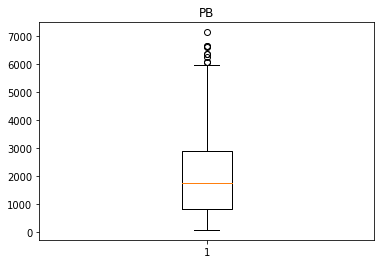

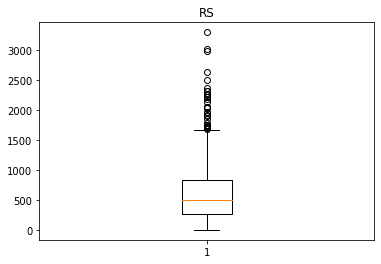

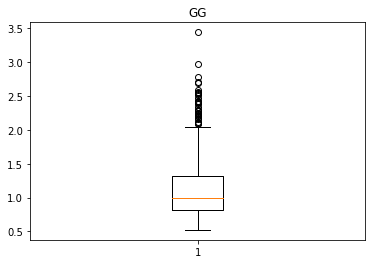

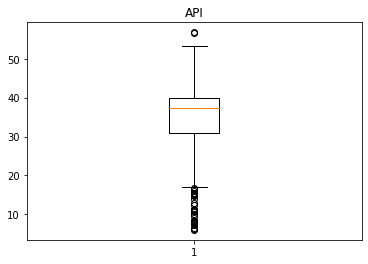

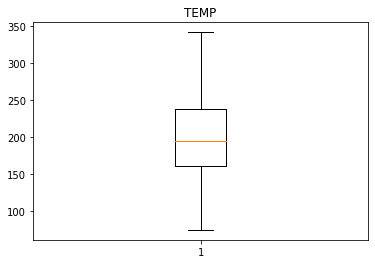

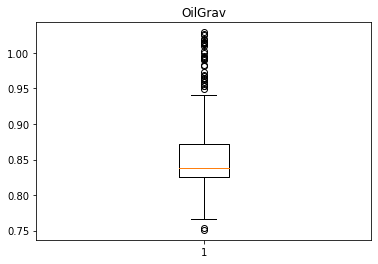

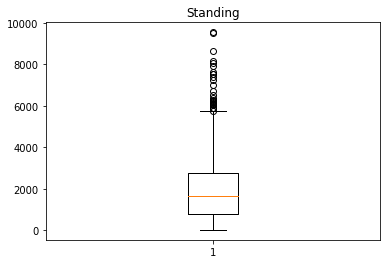

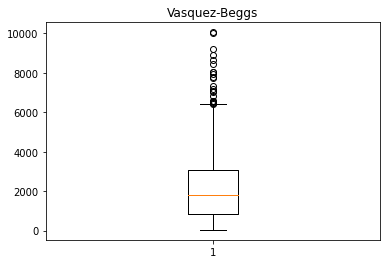

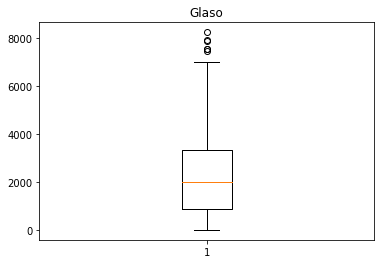

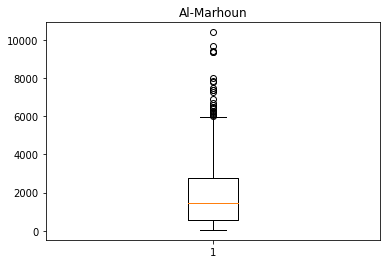

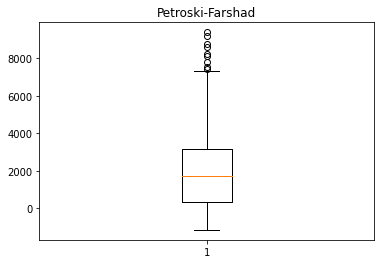

In [7]:
for coluna in df.columns:
    plt.boxplot(df[coluna])
    plt.title(coluna)
    plt.show()

In [8]:
#!pip install seaborn
import seaborn as sns

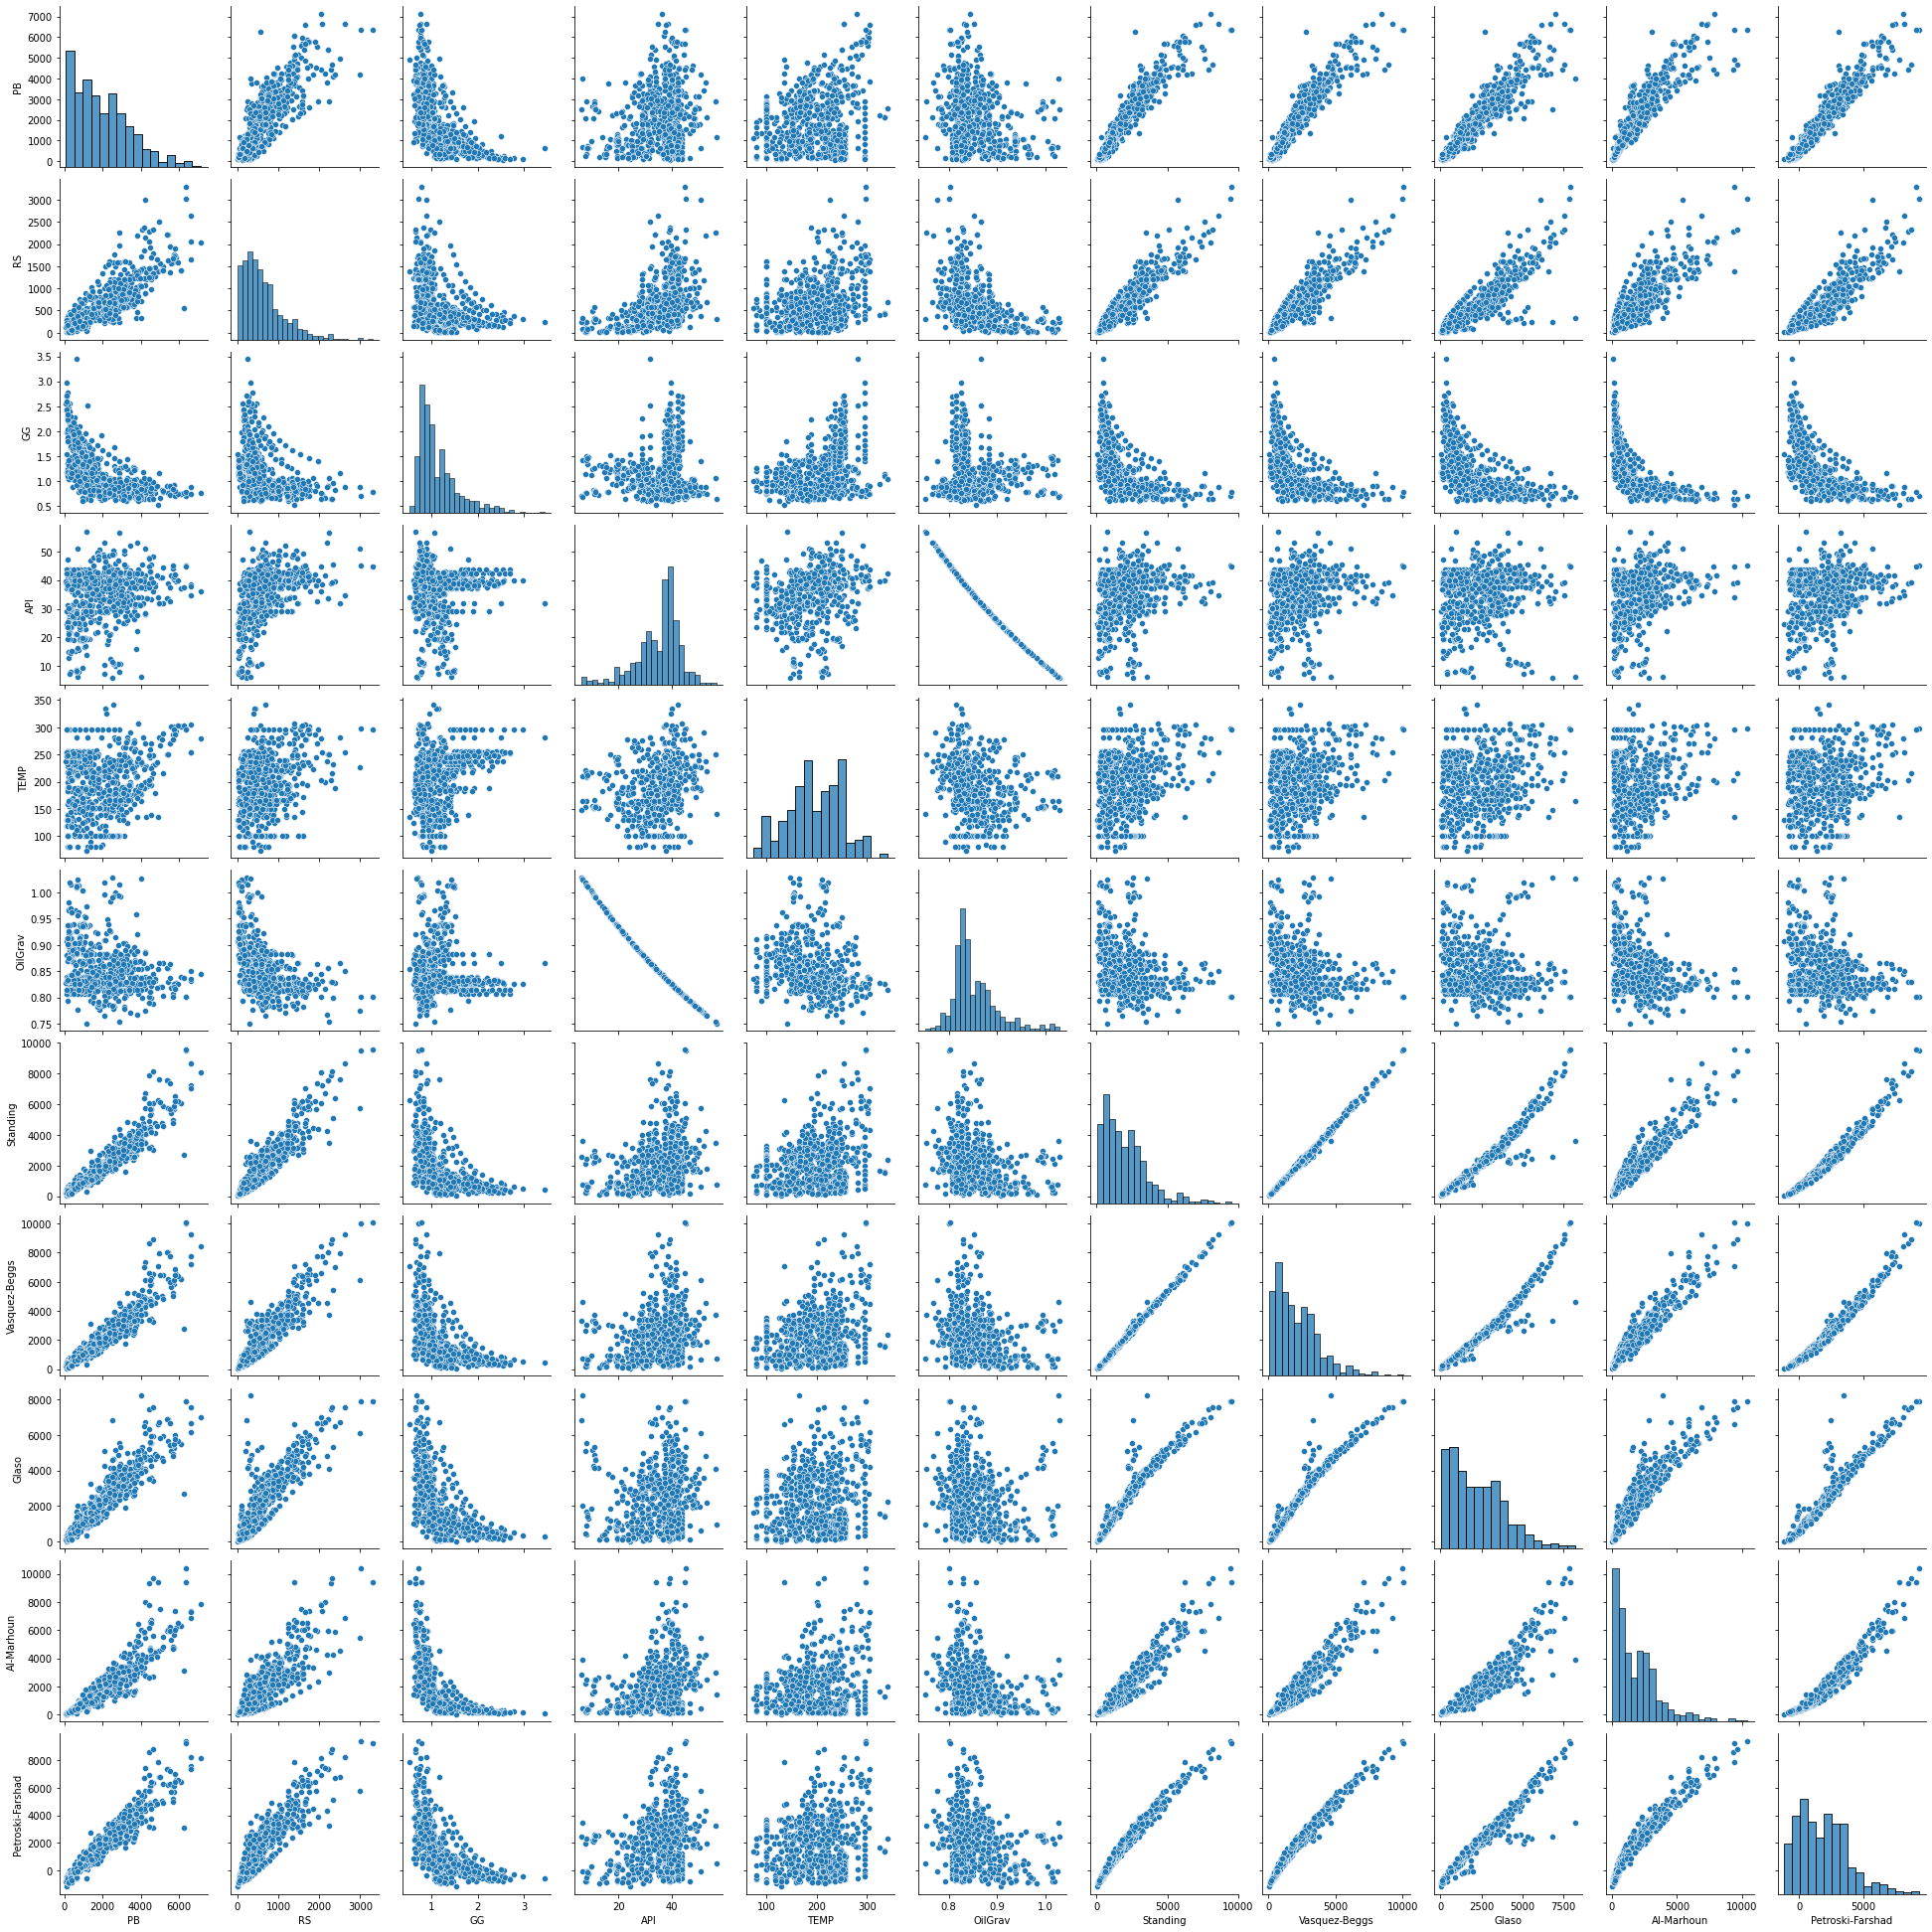

In [9]:
sns.pairplot(df, palette="GnBu_d")

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues") #annot mostra os coeficientes da matriz

Podemos verificar a grande correlação da Razão de Gás Óleo (RS) com a Pressão de Bolha
Isto porque o RS também é um propriedade determinável pela Temperatura, dendidade específica do gás e do óleo, ou seja, RS = f(T, P, GasGrav, OilGrav).

O ideal seria criação de modelos preditivos de para todas as propriedades termodinâmicas e físico químicas e compará-las com as
correlações empíricas Standing, Vasquez-Beggs, Al-Marhoun, Petrosky-Farshad e etc...
No entando os procedimentos seriam semelhantes. 

Apesas da possibildiade de enfatizar a melhoria na preção por modelos criados por machine learning, este não será realizado.

No trabalho de conclusão de curso intitulado 

"MODELAGEM DE PROPRIEDADES FÍSICO QUÍMICAS E TERMODINÂMICAS DO ÓLEO E GÁS UTILIZANDO INTELIGÊNCIA ARTIFICIAL"

abordei a predição utilizando algumas ténicas presentes no ramo de machine learning para predição de Pb e Bo
e ainda comparei os resultados obtidos com os Softwares Python (Open Source) e Statistica®, produzido pela Tibco utilizando licença estudante e versão trial

#Dataset Split Test

In [11]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:5].values
y = df.iloc[:, 0].values

correlations_values = df2.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

correlations_train, correlations_test, y_trainf, y_testf = train_test_split(correlations_values, y, test_size=0.33, random_state=0)

correlations = ['Standing', 'Vasquez-Beggs', 'Glaso', 'Al-Marhoun','Petroski-Farshad']

df_test = pd.DataFrame(correlations_test, columns= correlations)
df_test['PB'] = y_test



(727, 5)


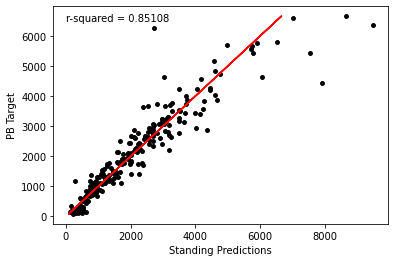

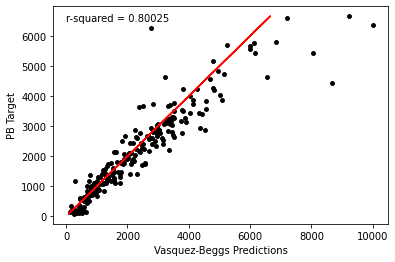

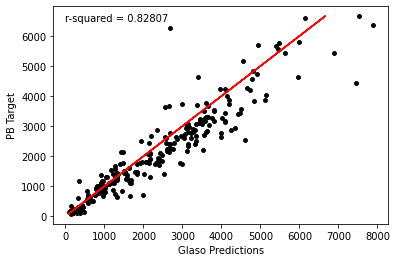

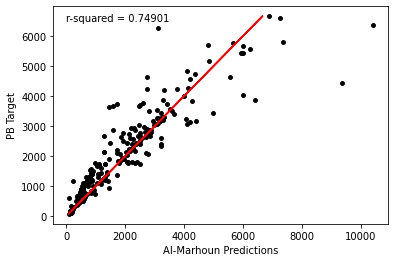

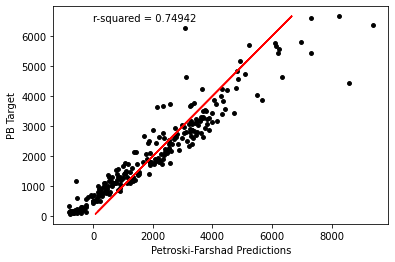

In [12]:
correlations = ['Standing', 'Vasquez-Beggs', 'Glaso', 'Al-Marhoun','Petroski-Farshad']

for coluna in correlations:
    plt.scatter(df_test[coluna], df_test['PB'], color = 'k', marker = 'o', s = 15)
    plt.xlabel(coluna + ' Predictions')
    plt.ylabel('PB Target')
    plt.plot(df_test['PB'], df_test['PB'], color = 'r')
    r2 = round(r2_score(df_test['PB'],df_test[coluna]),5)
    plt.annotate(f'r-squared = {r2}', (0,6500))
    plt.show()

#Motivation

Nas figura acima são demostradas o grau de dispersão dos valores predito pelas correlações empíricas em relação
aos valores verdadeiros de pressão de bolha determinados por métodos experimentais

Observa-se que as correlações apresentam grandes dispersões na determinição de valores altos de Pressão de Bolha, evidenciando as limitações das correlações empíricas hoje amplamente utilizadas. 

Por este e por outros motivos, a utilização do aprendizado de máquina (AM) surge como alternativa para geração de modelos que melhor se adaptam aos dados que se possuem. Nos modelos gerados por AM são métricas de eficiência do poder de predição e quanto ao poder de generalização. 

Modelos superajustados (overffiting) e sobreajustados (underfitting) não são desejáveis, com isso são variados parâmetros com o objetivo de se obter um modelo genalizado capaz de prover saídas confiáveis à dados não utilizados no treinamento do mesmo.



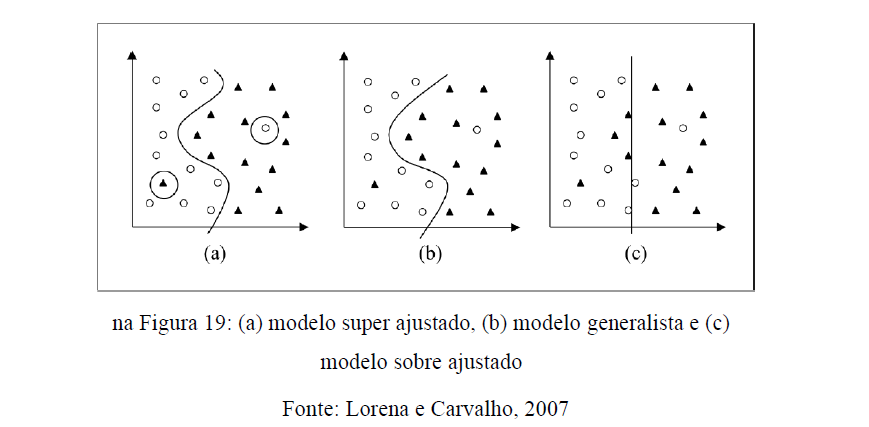

A proposta do trabalho foi gerar diferentes modelos de predição utilizando o aprendizado de máquinas, selecionando os hiperparâmetros que possibilitam a obtenção de valores da propriedade em questão com menor erro associado. 

Para quantificação dos resultados foi utilizada uma espécies de raqnueamento por Ikiensikimama e Azubuike, 2012, no qual é realizado um somatório da multiplicação dos pesos atribuídos a diferentes avaliadores estatíticos com as respectivas méticas de erros medidas, como é mostrado abaixo:




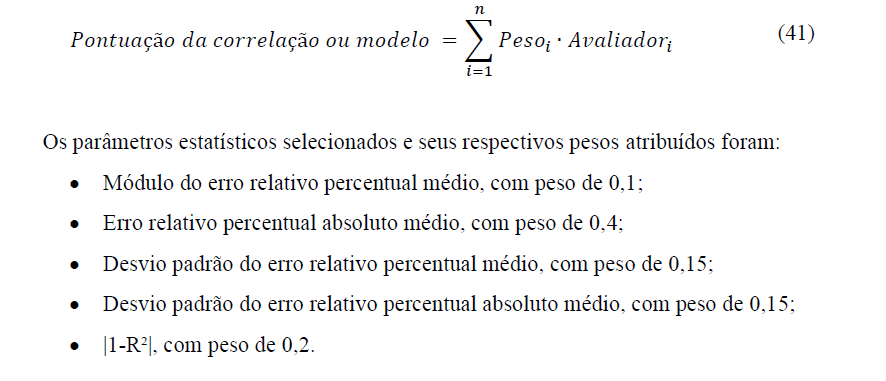


#Árvores de Decisão

In [14]:
#Variação de hiperparâmetros 
#Comprimento Total da árvore
i= 2
#Número minimo de amostras para divisão e criação de nodos
j= 2
#Número minimo de amostras para criação de folhas
k= 2
Contador = 1
melhorr2 = 0
ID = []
r2 = []

while (i < 31):
    j = 2
        
    while (j < 50):        
        k = 2    
        
        while (k < 50):
            linha = []
            Regressor = DecisionTreeRegressor(criterion='mse', max_depth= i,
                                          min_samples_split= k, 
                                          min_samples_leaf= j,
                                          random_state=0)
            
            Regressor.fit(X_train, y_train)
            Resultado = Regressor.predict(X_test)
            precisao = r2_score(y_test, Resultado)
            linha.append(Contador)
            linha.append(i)
            linha.append(j)
            linha.append(k)
            linha.append(precisao)
         
                    
            if melhorr2 < precisao:
                #melhor parâmetros encontrado                
                melhorr2 = precisao
                maxdep = i
                minsamplessplit = j
                minsamplesleaf = k
                IDbest = Contador
            
            r2.append(linha)
            Contador = Contador + 1
            ID.append(Contador)
            k = k + 2    
        j = j + 2
    i = i + 4

melhor=[]
melhor.append(IDbest)
melhor.append(maxdep)
melhor.append(minsamplessplit)
melhor.append(minsamplesleaf)
melhor.append(melhorr2)
print ('Melhor Árvore')
print (melhor)

#exportar layout da árvore de decisão
Regressor = DecisionTreeRegressor(criterion='mse', max_depth= maxdep,
                                          min_samples_split= minsamplessplit, 
                                          min_samples_leaf= minsamplesleaf,
                                          random_state=0)
Regressor.fit(X_train, y_train)
Resultado = Regressor.predict(X_test)
R2_test = round(r2_score(y_test, Resultado),5)

Obs_Pred_Linha = []
for valor in range(len(Resultado)):
    Obs_Pred_Linha.append([y_test[valor], Resultado[valor]]) 

RelatorioValores= pd.DataFrame(data = Obs_Pred_Linha, columns = ['Obs',
                                                                 'Predito'] )
Treinamento = Regressor.predict(X_train)

Obs_Pred_Treinamento_Linha = []
for valor in range(len(X_train)):
    Obs_Pred_Treinamento_Linha.append([y_train[valor], X_train[valor]]) 

R2_treinamento = round(r2_score(y_train, Treinamento),5)


Melhor Árvore
[1729, 14, 2, 2, 0.8563540499841225]


 R2_Train = 0.98709
 R2_test = 0.85635


,MAE,Emax,MSE,R2
0,324.318125,3985.333333,309046.798846,0.856354


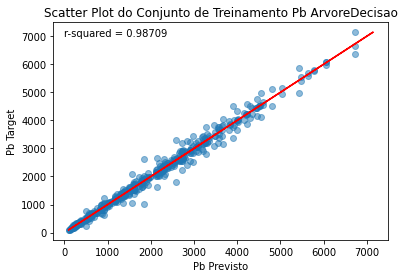

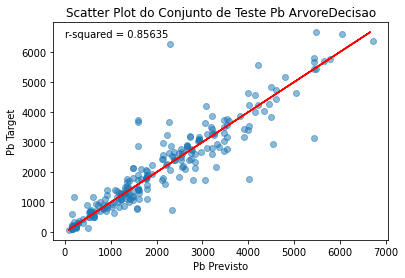

In [15]:
print(f' R2_Train = {R2_treinamento}')
print(f' R2_test = {R2_test}')

ListaStatis = []
MatrizStatis = []
#ListaStatis.append(mean_absolute_percentage_error(y_test, Resultado))
ListaStatis.append(mean_absolute_error(y_test, Resultado))
ListaStatis.append(max_error(y_test, Resultado))
ListaStatis.append(mean_squared_error(y_test, Resultado))
ListaStatis.append(r2_score(y_test, Resultado))

MatrizStatis.append(ListaStatis)

statistica = pd.DataFrame(data = MatrizStatis, columns = ['MAE','Emax','MSE',
                                                          'R2'] )
display(statistica)

plt.scatter(Treinamento, y_train, alpha=0.5)
plt.plot(y_train, y_train, color = 'red')
plt.title('Scatter Plot do Conjunto de Treinamento Pb ArvoreDecisao')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_treinamento}', (0,7000))
plt.show()

plt.scatter(Resultado, y_test, alpha=0.5)
plt.plot(y_test,y_test, color = 'red')
plt.title('Scatter Plot do Conjunto de Teste Pb ArvoreDecisao')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_test}', (0,6500))
plt.show()

In [18]:
import graphviz
#from sklearn import tree
DT = tree.export_graphviz(Regressor, out_file =None,
                       feature_names = ['RS','GG','API','Temp'],
                       filled=True, leaves_parallel=False)

# Draw graph
graph = graphviz.Source(DT, format="png") 
graph

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

#Random Forest

[7, 14, 0.9216013382621127]


,Index,Quatidade de Árvores,R2
0,1,2,0.892086
1,2,4,0.911740
2,3,6,0.915970
3,4,8,0.921583
4,5,10,0.920192
5,6,12,0.920025
6,7,14,0.921601
7,8,16,0.918557
8,9,18,0.916546
9,10,20,0.914501


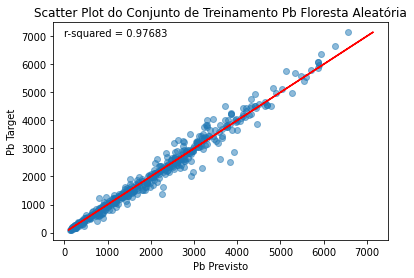

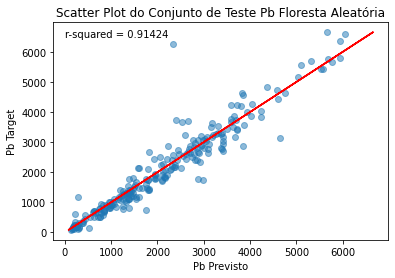

In [19]:
from sklearn.ensemble import RandomForestRegressor

#variação de parâmetros
i = 2



Contador = 1
melhorr2 = 0
ID = []
r2 = []
Obs_Pred_Linha = []
Resultado_test = []

while (i < 25):    
    linha = []
    
    Regressor = RandomForestRegressor(n_estimators = i,
                                              criterion='mse', 
                                              max_depth= maxdep,
                                              min_samples_split= minsamplessplit, 
                                              min_samples_leaf= minsamplesleaf,
                                              random_state = 0)
            
    Regressor.fit(X_train,y_train)
    Resultado = Regressor.predict(X_test)
    precisaoatual = r2_score(y_test, Resultado)
    linha.append(Contador)
    linha.append(i)
    linha.append(precisaoatual)
    r2.append(linha)
    
    Resultado_test.append(["",i])    
    for valor in range(len(Resultado)):
        result_test = Regressor.predict(X_train)
        Resultado_test.append([y_test[valor], result_test[valor]]) 
                             
    if melhorr2 < precisaoatual:
        #melhor parâmetros encontrado                
        melhorr2 = precisaoatual
        n_trees_best = i
        IDbest = Contador

    Contador = Contador + 1
    ID.append(Contador)     
    i = i + 2  
    
    
melhor=[]
melhor.append(IDbest)
melhor.append(n_trees_best)
melhor.append(melhorr2)
print (melhor)

TEST= pd.DataFrame(data = r2, columns= ['Index','Quatidade de Árvores','R2'])
TEST.set_index('Index')
display(TEST)

Treinamento = Regressor.predict(X_train)
R2_treinamento = round(r2_score(y_train, Treinamento),5)

Resultado = Regressor.predict(X_test)
R2_test = round(r2_score(y_test, Resultado),5)

plt.scatter(Treinamento, y_train, alpha=0.5)
plt.plot(y_train, y_train, color = 'red')
plt.title('Scatter Plot do Conjunto de Treinamento Pb Floresta Aleatória')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_treinamento}', (0,7000))
plt.show()

plt.scatter(Resultado, y_test, alpha=0.5)
plt.plot(y_test,y_test, color = 'red')
plt.title('Scatter Plot do Conjunto de Teste Pb Floresta Aleatória')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_test}', (0,6500))
plt.show()

# ANN

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score,max_error

print(tf.__version__)

2.6.0


In [21]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
y = y.reshape(-1,1)
y_norm = min_max_scaler.fit_transform(y)

#como foi utilizado o mesmo seed ou random_state, os mesmos dados foram utilizados para treino e para teste
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.33, random_state=0)


*FURTUNA, R., CURTEANU, S. e CAZACU, M., Optimization methodology applied to feed-forward artificial neural network parameters. International Journal of Quantum Chemistry, v. 111, n. 3, p. 539–553, Iasi, Romênia, dezembro, 2009*

This Article reports the optimization methodology, this means, how to tune hyperparameters of our neral Network. 

To optimize network performance, a series of neural network parameters such as **number of hidden layers, number of neurons in
the hidden layers, learning rate, momentum term, and activation function of the output layer** were elected after series of simulations in which there were varied all these parameters, while choosing a optimum **number of training epochs**.

The role of the hidden layers is to **detect relationships between network inputs and outputs**.

The most important problem is to find the **minimum number of hidden layers** that can create adequately complex decision boundaries, also reducing the computational time needed for training. For many applications, the optimum number of hidden layers has been found to be less than the number of inputs.

The optimum number of training epochs has to be determined through cross-validation, a highly recommended method for stopping network training. The training set is divided in around 80% data for training and the rest are data for cross-validation. 

Training and testing are done in the same time and the training is stopped when the mean squared error for the cross-validation data set starts to rise. This moment is called point of maximum generalization. Depending on the network performance at this time, different configurations can then be tried, decreasing or increasing the number of neurons in the hidden layer(s)

In [22]:
Nin = X_norm[1].size
Nout = 1
#Nhidden = 23

R2melhor = 0
report = []

activation_function = ['sigmoid', 'tanh', 'relu']
iteration = 0

for Nhidden in range(1,31,2):
    
    for hidden_activation in activation_function:
        
        for output_activation in activation_function:
            
            iteration += 1
            print(f'########### Iter {iteration} NHidden {Nhidden} ###########')
            print(f'hidden_activation {hidden_activation} output_activation {output_activation}')

            input_ = keras.layers.Input(shape=(Nin,))
            hidden = keras.layers.Dense(Nhidden, activation=hidden_activation,kernel_initializer="lecun_normal",)(input_)
            output = keras.layers.Dense(Nout, activation=output_activation)(hidden)

            # instantiate model
            model = keras.models.Model(inputs=[input_],outputs=[output])

            # define optimizer and learning rate
            optimizer = keras.optimizers.Adam(learning_rate = 0.1)

            # compile model to train it
            model.compile(loss="mean_squared_error", optimizer=optimizer)

            history = model.fit(X_train_norm,y_train_norm, epochs=500, batch_size = 64)

            results_ANN = model.predict(X_test_norm)
    
            R2_test = round(r2_score(y_test_norm, results_ANN),5)
        
            report.append([iteration, Nhidden,hidden_activation, output_activation, R2_test])
    
            if R2_test > R2melhor:
                R2melhor = R2_test
                Best_Tunning = [iteration, Nhidden, hidden_activation, output_activation, R2_test] 

Report = pd.DataFrame(report, columns =['iteration', 'Neurons_in_Hidden','hidden_activation', 'output_activation', 'R2_test'] )

########### Iter 1 NHidden 1 ###########
hidden_activation sigmoid output_activation sigmoid
Epoch 1/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0934
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0424
Epoch 4/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0431
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 9/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0407
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0406
Epoch 11/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0405
Epoch 12/500
8/8 [=============================

8/8 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 104/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 105/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 106/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 107/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 108/500
8/8 [==============================] - 0s 858us/step - loss: 0.0050
Epoch 109/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 110/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 111/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 112/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 113/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 114/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 115/500
8/8 [===========================

8/8 [==============================] - 0s 998us/step - loss: 0.0050
Epoch 205/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 206/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 207/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 208/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 209/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 210/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 211/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 212/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 213/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 214/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 215/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 216/500
8/8 [==============================] -

Epoch 306/500
8/8 [==============================] - 0s 999us/step - loss: 0.0048
Epoch 307/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 308/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 309/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 310/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 311/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 312/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 313/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 314/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 315/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 316/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0048
Epoch 317/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 318/500
8/8 [================

8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 408/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 409/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 410/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 411/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 412/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 413/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 414/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0050
Epoch 415/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 416/500
8/8 [==============================] - 0s 857us/step - loss: 0.0049
Epoch 417/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 418/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 419/500
8/8 [==================

8/8 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 9/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 10/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 11/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 12/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 13/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 14/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 15/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0051
Epoch 16/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 17/500
8/8 [==============================] - 0s 857us/step - loss: 0.0056
Epoch 18/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 19/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 20/500
8/8 [==============================] - 0s 1000us

Epoch 111/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0059
Epoch 112/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 113/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 114/500
8/8 [==============================] - 0s 999us/step - loss: 0.0049
Epoch 115/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 116/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 117/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 118/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 119/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 120/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 121/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0056
Epoch 122/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 123/500
8/8 [==========

8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 213/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 214/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 215/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 216/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0050
Epoch 217/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 218/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 219/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0051
Epoch 220/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 221/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 222/500
8/8 [==============================] - 0s 1000us/step - loss: 0.0051
Epoch 223/500
8/8 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 224/500
8/8 [==========================

KeyboardInterrupt: 

In [23]:
display(Report)

display(Best_Tunning)

NameError: name 'Report' is not defined

In [24]:
input_ = keras.layers.Input(shape=(Nin,))
hidden = keras.layers.Dense(Best_Tunning[1], activation=Best_Tunning[2],kernel_initializer="lecun_normal",)(input_)
output = keras.layers.Dense(Nout, activation=Best_Tunning[3])(hidden)

# instantiate model
model = keras.models.Model(inputs=[input_],outputs=[output])

# define optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate = 0.1)

# compile model to train it
model.compile(loss="mean_squared_error", optimizer=optimizer)

history = model.fit(X_train_norm,y_train_norm, epochs=500, batch_size = 50)

results_ANN = model.predict(X_test_norm)
    
R2_test1 = round(r2_score(y_test_norm, results_ANN),5)

train_ANN = model.predict(X_train_norm)

Epoch 1/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0401
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0349
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 11/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 12/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 13/500
10/10 [=================

10/10 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 102/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 103/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 104/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 105/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 106/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 107/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 108/500
10/10 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 109/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 110/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 111/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 112/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 113/500
10/10 [=========

10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 201/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 202/500
10/10 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 203/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 204/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 205/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 206/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 207/500
10/10 [==============================] - 0s 1000us/step - loss: 0.0051
Epoch 208/500
10/10 [==============================] - 0s 1000us/step - loss: 0.0050
Epoch 209/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 210/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 211/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 212/500
10/10 [

10/10 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 300/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 301/500
10/10 [==============================] - 0s 1000us/step - loss: 0.0052
Epoch 302/500
10/10 [==============================] - 0s 889us/step - loss: 0.0055
Epoch 303/500
10/10 [==============================] - 0s 889us/step - loss: 0.0049
Epoch 304/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 305/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 306/500
10/10 [==============================] - 0s 1000us/step - loss: 0.0049
Epoch 307/500
10/10 [==============================] - 0s 999us/step - loss: 0.0049
Epoch 308/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 309/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 310/500
10/10 [==============================] - 0s 1000us/step - loss: 0.0055
Epoch 311/500
1

10/10 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 398/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 399/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 400/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 401/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 402/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 403/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 404/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 405/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 406/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 407/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 408/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 409/500
10/10 [=========

10/10 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 497/500
10/10 [==============================] - ETA: 0s - loss: 0.005 - 0s 2ms/step - loss: 0.0051
Epoch 498/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 499/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 500/500
10/10 [==============================] - 0s 1ms/step - loss: 0.0049


In [25]:
#desnormalizar o predito

train_ANN_final = train_ANN*(df['PB'].max()-df['PB'].min())+df['PB'].min()

results_ANN_final =  results_ANN*(df['PB'].max()-df['PB'].min())+df['PB'].min()


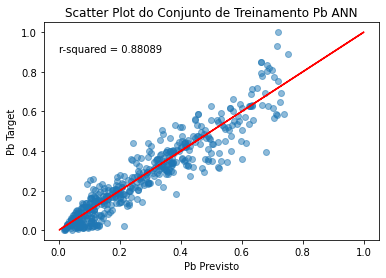

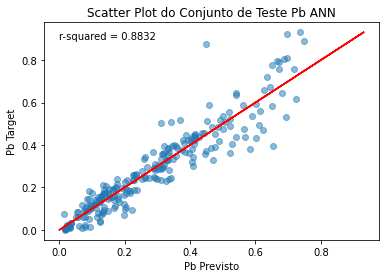

In [26]:
R2_treinamento1 = round(r2_score(y_train_norm, train_ANN),5)

plt.scatter(train_ANN, y_train_norm, alpha=0.5)
plt.plot(y_train_norm, y_train_norm, color = 'red')
plt.title('Scatter Plot do Conjunto de Treinamento Pb ANN')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_treinamento1}', (0,0.9))
plt.show()

plt.scatter(results_ANN, y_test_norm, alpha=0.5)
plt.plot(y_test_norm,y_test_norm, color = 'red')
plt.title('Scatter Plot do Conjunto de Teste Pb ANN')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_test1}', (0,0.9))
plt.show()

In [27]:
#exemplo de nova predição

#necessário normalizar
testeinput_norm = np.array([0.4,0.3,0.7,0.5])

testeinput_norm = testeinput_norm.reshape(1,-1)
Resultado = model.predict(testeinput_norm)
print(Resultado)

Resultado = Resultado*(df['PB'].max()-df['PB'].min())+df['PB'].min()
print(Resultado)

[[0.3993507]]
[[2899.4944]]


# SVR

### Tunning By GRID SEARCH

In [28]:
from sklearn.svm import SVR

In [29]:
C = [0.001, 0.01, 0.1, 1.0, 10]
gamma = [0.01,0.317,10.0, 317, 10000]
epsilon =[0.01, 0.0317, 0.1, 0.317, 1.0]

In [30]:
reportsvr = []
R2melhor_svr = 0
iteration = 0
for Cvar in C:
    for GAMMA in gamma:
        for EPSILON in epsilon:
            iteration += 1
            svr = SVR(kernel="rbf", C= Cvar, gamma = GAMMA, epsilon = EPSILON)

            svr.fit(X_train_norm, y_train_norm.reshape(-1,))
            
            results_SVR = svr.predict(X_test_norm)
            R2_test_svr = round(r2_score(y_test_norm, results_SVR),5)
                        
            reportsvr.append([iteration, Cvar, GAMMA, EPSILON, R2_test_svr])
            results_SVR = svr.predict(X_test_norm)
            
            if R2_test_svr > R2melhor_svr:
                R2melhor_svr = R2_test_svr
                Best_Tunning_svr = [iteration, Cvar, GAMMA, EPSILON, R2melhor_svr] 

Reportsvr = pd.DataFrame(reportsvr, columns =['iteration', 'C','GAMMA', 'EPSILON', 'R2_test'] )


,iteration,C,GAMMA,EPSILON,R2_test
0,1,0.001,0.01,0.0100,-0.06066
1,2,0.001,0.01,0.0317,-0.05039
2,3,0.001,0.01,0.1000,-0.03602
3,4,0.001,0.01,0.3170,-0.05628
4,5,0.001,0.01,1.0000,-1.10558
...,...,...,...,...,...
120,121,10.000,10000.00,0.0100,0.05435
121,122,10.000,10000.00,0.0317,0.05316
122,123,10.000,10000.00,0.1000,0.04577
123,124,10.000,10000.00,0.3170,-0.16227


[86, 1.0, 10.0, 0.01, 0.94984]

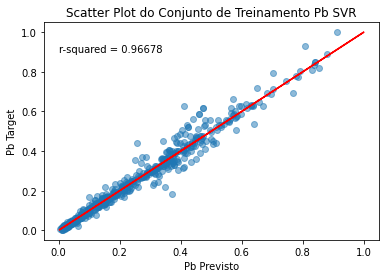

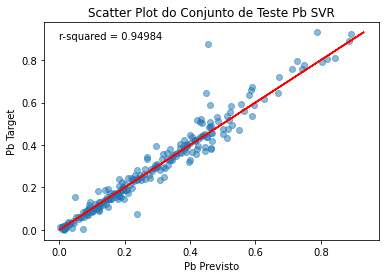

In [31]:
display (Reportsvr)
display(Best_Tunning_svr)

svr = SVR(kernel="rbf", C= Best_Tunning_svr[1], gamma = Best_Tunning_svr[2], epsilon = Best_Tunning_svr[3])
svr.fit(X_train_norm, y_train_norm.reshape(-1,))

Train_SVR = svr.predict(X_train_norm)
R2_treinamento1 = round(r2_score(y_train_norm, Train_SVR),5)

plt.scatter(Train_SVR, y_train_norm, alpha=0.5)
plt.plot(y_train_norm, y_train_norm, color = 'red')
plt.title('Scatter Plot do Conjunto de Treinamento Pb SVR')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_treinamento1}', (0,0.9))
plt.show()

Test_SVR = svr.predict(X_test_norm)
R2_test1 = round(r2_score(y_test_norm, Test_SVR),5)

plt.scatter(Test_SVR, y_test_norm, alpha=0.5)
plt.plot(y_test_norm,y_test_norm, color = 'red')
plt.title('Scatter Plot do Conjunto de Teste Pb SVR')
plt.ylabel('Pb Target')
plt.xlabel('Pb Previsto')
plt.annotate(f'r-squared = {R2_test1}', (0,0.9))
plt.show()

# RESULTADOS